In [1]:
import pandas as pd
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
from numpy import concatenate
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# 데이터 불러오기 및 인덱스 설정
# Date를 날짜 형식으로 변환하기는 사전에 다른 코드로 진행하여 완료해 놓았음
df = pd.read_csv('./data2.csv', )
df_date = df.set_index('Date').copy()

In [3]:
# 잘 불러와졌나 확인
df_date

,Adj Close,Fast %K,Slow %K(D),Slow %D(J),J Binary(80%),J Binary(50%),Open,High,Low,Close,...,macds,macdo,VIX,Bullish,Neutral,Bearish,Bullish 8-Week Mov Avg,Bull-Bear Spread,Fear Greed,Put Call
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-03,1271.8700,90.0738,90.0731,91.4694,1.0,1.0,1257.6200,1276.1700,1257.6200,1271.8700,...,14.6675,0.2548,17.61,0.56,0.26,0.18,0.51,0.38,68.0,0.40
2011-01-04,1270.2000,86.2186,88.0049,89.7363,1.0,1.0,1272.9500,1274.1200,1262.6600,1270.2000,...,14.7448,0.3094,17.38,0.56,0.26,0.18,0.51,0.38,68.0,0.43
2011-01-05,1276.5601,97.6107,88.8356,88.9712,1.0,1.0,1268.7800,1277.6300,1265.3600,1276.5601,...,14.8945,0.5988,17.02,0.56,0.26,0.18,0.51,0.38,67.0,0.48
2011-01-06,1273.8500,90.4676,89.5697,88.8034,1.0,1.0,1276.2900,1278.1700,1270.4301,1273.8500,...,15.0045,0.4400,17.40,0.56,0.26,0.18,0.51,0.38,64.0,0.46
2011-01-07,1271.5000,82.5848,89.3911,89.2655,1.0,1.0,1274.4100,1276.8300,1261.7000,1271.5000,...,15.0122,0.0307,17.14,0.56,0.26,0.18,0.51,0.38,63.0,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-14,3383.5400,26.3183,13.8121,16.7608,0.0,0.0,3363.5601,3402.9299,3363.5601,3383.5400,...,36.1941,-22.2306,25.85,0.24,0.28,0.48,0.27,-0.25,59.0,0.49
2020-09-15,3401.2000,32.6790,20.1493,16.3317,0.0,0.0,3407.7300,3419.4800,3389.2500,3401.2000,...,31.4839,-18.8406,25.59,0.24,0.28,0.48,0.27,-0.25,59.0,0.46
2020-09-16,3385.4900,27.0206,20.1686,18.0433,0.0,0.0,3411.2300,3428.9199,3384.4500,3385.4900,...,27.2295,-17.0178,26.04,0.24,0.28,0.48,0.27,-0.25,56.0,0.51


In [4]:
# Nan 값이 있는지 확인
# 모두 2445개로 Nan 값, str 값 없음 확인
df_date.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2445 entries, 2011-01-03 to 2020-09-18
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Adj Close               2445 non-null   float64
 1   Fast %K                 2445 non-null   float64
 2   Slow %K(D)              2445 non-null   float64
 3   Slow %D(J)              2445 non-null   float64
 4   J Binary(80%)           2445 non-null   float64
 5   J Binary(50%)           2445 non-null   float64
 6   Open                    2445 non-null   float64
 7   High                    2445 non-null   float64
 8   Low                     2445 non-null   float64
 9   Close                   2445 non-null   float64
 10  Volume                  2445 non-null   float64
 11  macd                    2445 non-null   float64
 12  macds                   2445 non-null   float64
 13  macdo                   2445 non-null   float64
 14  VIX                     2445 n

In [5]:
# 0,1로 스케일링
scaler = MinMaxScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df_date), columns=df_date.columns, index = df_date.index)
df_scaled

,Adj Close,Fast %K,Slow %K(D),Slow %D(J),J Binary(80%),J Binary(50%),Open,High,Low,Close,...,macds,macdo,VIX,Bullish,Neutral,Bearish,Bullish 8-Week Mov Avg,Bull-Bear Spread,Fear Greed,Put Call
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-03,0.069568,0.900738,0.906572,0.923738,1.0,1.0,0.064929,0.061328,0.074315,0.069568,...,0.777102,0.503418,0.115160,0.904762,0.289474,0.076923,0.933333,0.924051,0.701031,0.032967
2011-01-04,0.068895,0.862186,0.885406,0.905558,1.0,1.0,0.071142,0.060496,0.076364,0.068895,...,0.777384,0.503866,0.112033,0.904762,0.289474,0.076923,0.933333,0.924051,0.701031,0.065934
2011-01-05,0.071458,0.976107,0.893908,0.897532,1.0,1.0,0.069452,0.061921,0.077461,0.071458,...,0.777929,0.506235,0.107138,0.904762,0.289474,0.076923,0.933333,0.924051,0.690722,0.120879
2011-01-06,0.070366,0.904676,0.901420,0.895772,1.0,1.0,0.072496,0.062140,0.079522,0.070366,...,0.778330,0.504935,0.112305,0.904762,0.289474,0.076923,0.933333,0.924051,0.659794,0.098901
2011-01-07,0.069419,0.825848,0.899593,0.900619,1.0,1.0,0.071734,0.061596,0.075974,0.069419,...,0.778358,0.501583,0.108770,0.904762,0.289474,0.076923,0.933333,0.924051,0.649485,0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-14,0.920495,0.263183,0.126128,0.140046,0.0,0.0,0.918462,0.924815,0.930229,0.920495,...,0.855525,0.319288,0.227192,0.142857,0.342105,0.846154,0.133333,0.126582,0.608247,0.131868
2020-09-15,0.927611,0.326790,0.190982,0.135545,0.0,0.0,0.936364,0.931534,0.940670,0.927611,...,0.838366,0.347049,0.223657,0.142857,0.342105,0.846154,0.133333,0.126582,0.608247,0.098901
2020-09-16,0.921281,0.270206,0.191180,0.153500,0.0,0.0,0.937783,0.935367,0.938719,0.921281,...,0.822867,0.361975,0.229776,0.142857,0.342105,0.846154,0.133333,0.126582,0.577320,0.153846


In [6]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
#    forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [7]:
# 과거 20일의 데이터를 가지고
n_days = 20
n_features = len(df_scaled.columns)

# 미래 1일을 예측
future_window = 1

In [8]:
reframed = series_to_supervised(df_scaled, n_days, 1)

In [9]:
reframed

,var1(t-20),var2(t-20),var3(t-20),var4(t-20),var5(t-20),var6(t-20),var7(t-20),var8(t-20),var9(t-20),var10(t-20),...,var13(t),var14(t),var15(t),var16(t),var17(t),var18(t),var19(t),var20(t),var21(t),var22(t)
Date,,,,,,,,,,,,,,,,,,,,,
2011-02-01,0.069568,0.900738,0.906572,0.923738,1.0,1.0,0.064929,0.061328,0.074315,0.069568,...,0.769637,0.494009,0.115432,0.571429,0.236842,0.487179,0.966667,0.544304,0.422680,0.131868
2011-02-02,0.068895,0.862186,0.885406,0.905558,1.0,1.0,0.071142,0.060496,0.076364,0.068895,...,0.769229,0.497657,0.110945,0.571429,0.236842,0.487179,0.966667,0.544304,0.474227,0.087912
2011-02-03,0.071458,0.976107,0.893908,0.897532,1.0,1.0,0.069452,0.061921,0.077461,0.071458,...,0.769170,0.500806,0.102651,0.809524,0.184211,0.307692,0.966667,0.759494,0.484536,0.230769
2011-02-04,0.070366,0.904676,0.901420,0.895772,1.0,1.0,0.072496,0.062140,0.079522,0.070366,...,0.769450,0.503846,0.092318,0.809524,0.184211,0.307692,0.966667,0.759494,0.505155,0.296703
2011-02-07,0.069419,0.825848,0.899593,0.900619,1.0,1.0,0.071734,0.061596,0.075974,0.069419,...,0.770297,0.508956,0.097077,0.809524,0.184211,0.307692,0.966667,0.759494,0.577320,0.098901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-14,0.916187,0.918155,0.910381,0.927804,1.0,1.0,0.920529,0.914900,0.929448,0.916187,...,0.855525,0.319288,0.227192,0.142857,0.342105,0.846154,0.133333,0.126582,0.608247,0.131868
2020-09-15,0.919871,0.967893,0.907346,0.917104,1.0,1.0,0.925474,0.918587,0.936593,0.919871,...,0.838366,0.347049,0.223657,0.142857,0.342105,0.846154,0.133333,0.126582,0.608247,0.098901
2020-09-16,0.923010,0.972346,0.955207,0.927274,1.0,1.0,0.927979,0.921620,0.932907,0.923010,...,0.822867,0.361975,0.229776,0.142857,0.342105,0.846154,0.133333,0.126582,0.577320,0.153846


In [10]:
# 학습, 훈련 세트로 분할
df_test = reframed.loc['2019-12-01':]
df_train = reframed.loc[:'2019-12-31']

values = df_train.values
test_values = df_test.values

# 분할지점
train = values
test = test_values

n_obs = n_days * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]
print(train_X.shape, len(train_X), train_y.shape)

train_X = train_X.reshape((train_X.shape[0], n_days, n_features))
test_X = test_X.reshape((test_X.shape[0], n_days, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(2244, 440) 2244 (2244,)
(2244, 20, 22) (2244,) (202, 20, 22) (202,)


In [11]:
test_y

array([0.81182781, 0.8034985 , 0.81138048, 0.81326228, 0.8247387 ,
       0.82072925, 0.81934305, 0.82301402, 0.83386995, 0.8339626 ,
       0.84308973, 0.84352091, 0.84296478, 0.84869904, 0.85508598,
       0.85621025, 0.85595634, 0.86261734, 0.8626617 , 0.85511419,
       0.85893832, 0.8698466 , 0.86057842, 0.86518426, 0.86151725,
       0.86791233, 0.8766365 , 0.87286883, 0.88204827, 0.88004151,
       0.88251575, 0.89360537, 0.89876734, 0.89520912, 0.89559597,
       0.8971232 , 0.88500607, 0.86411637, 0.87725707, 0.87611261,
       0.88024702, 0.85681872, 0.86624805, 0.88586039, 0.90081028,
       0.9052792 , 0.89799763, 0.90782194, 0.91010268, 0.918847  ,
       0.91662663, 0.91913307, 0.91515585, 0.92154682, 0.91634056,
       0.9020434 , 0.85696778, 0.81760628, 0.8128432 , 0.75738328,
       0.74749454, 0.8023017 , 0.76730027, 0.81837598, 0.77558916,
       0.75480838, 0.66381504, 0.71848515, 0.6617276 , 0.55665872,
       0.64949365, 0.51857457, 0.57622263, 0.52339814, 0.52794

In [12]:
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))

model.add(Dense(future_window))
model.compile(loss='mse', optimizer='adam')

In [13]:
history = model.fit(train_X, train_y, epochs=100, batch_size=200, verbose=2, shuffle=False, validation_data=(test_X, test_y))

Epoch 1/100
12/12 - 1s - loss: 0.0122 - val_loss: 0.0352
Epoch 2/100
12/12 - 0s - loss: 0.0568 - val_loss: 0.0955
Epoch 3/100
12/12 - 0s - loss: 0.0179 - val_loss: 0.0514
Epoch 4/100
12/12 - 0s - loss: 0.0096 - val_loss: 0.0236
Epoch 5/100
12/12 - 0s - loss: 0.0058 - val_loss: 0.0358
Epoch 6/100
12/12 - 0s - loss: 0.0018 - val_loss: 0.0222
Epoch 7/100
12/12 - 0s - loss: 0.0022 - val_loss: 0.0241
Epoch 8/100
12/12 - 0s - loss: 0.0013 - val_loss: 0.0165
Epoch 9/100
12/12 - 0s - loss: 0.0011 - val_loss: 0.0185
Epoch 10/100
12/12 - 0s - loss: 8.7376e-04 - val_loss: 0.0146
Epoch 11/100
12/12 - 0s - loss: 7.6365e-04 - val_loss: 0.0138
Epoch 12/100
12/12 - 0s - loss: 6.7373e-04 - val_loss: 0.0124
Epoch 13/100
12/12 - 0s - loss: 5.7905e-04 - val_loss: 0.0108
Epoch 14/100
12/12 - 0s - loss: 5.0779e-04 - val_loss: 0.0099
Epoch 15/100
12/12 - 0s - loss: 4.5341e-04 - val_loss: 0.0090
Epoch 16/100
12/12 - 0s - loss: 4.0474e-04 - val_loss: 0.0081
Epoch 17/100
12/12 - 0s - loss: 3.6221e-04 - val_loss

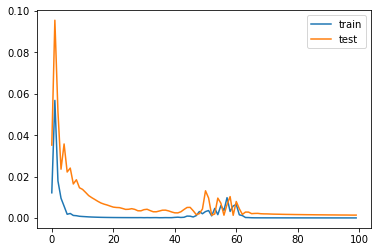

In [14]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [15]:
test_X.shape

(202, 20, 22)

In [16]:
y_pred = model.predict(test_X)

In [17]:
y_pred[1][-1]

0.82304746

In [18]:
len(test_y)

202

In [19]:
prediction_x = []
prediction_y = []

for i in range(0, len(y_pred)):
    prediction_x.append(y_pred[i][-1])
    prediction_y.append(i) #+future_window)

In [20]:
prediction_x

[0.83150125,
 0.82304746,
 0.8093998,
 0.81043005,
 0.81236815,
 0.8225292,
 0.8214191,
 0.8199042,
 0.8223835,
 0.8229141,
 0.8316626,
 0.83880657,
 0.84359634,
 0.8448506,
 0.84490126,
 0.8455755,
 0.8528381,
 0.8567541,
 0.8596193,
 0.86036104,
 0.85768205,
 0.8587453,
 0.86662084,
 0.8647895,
 0.8656335,
 0.8647178,
 0.86683565,
 0.87572885,
 0.8765025,
 0.87974817,
 0.88052535,
 0.8811958,
 0.8833428,
 0.8869715,
 0.88655967,
 0.88761735,
 0.88430756,
 0.8798917,
 0.86108285,
 0.8561724,
 0.8549281,
 0.8631505,
 0.8590086,
 0.85925406,
 0.8702936,
 0.8821953,
 0.8891662,
 0.88165414,
 0.8898873,
 0.90164083,
 0.90828353,
 0.9070742,
 0.90972525,
 0.9075733,
 0.9102155,
 0.9069248,
 0.89922327,
 0.86590654,
 0.83303523,
 0.8132138,
 0.7871673,
 0.75472885,
 0.7681381,
 0.76451004,
 0.78295845,
 0.76846546,
 0.7489753,
 0.70024544,
 0.70102453,
 0.67188865,
 0.60945195,
 0.61595005,
 0.5546705,
 0.5440574,
 0.5132038,
 0.50215405,
 0.4870524,
 0.4628822,
 0.47635055,
 0.49086624,
 0

In [21]:
mse = 0

for i in range(5, len(y_pred) - n_days):
    mse += (prediction_x[i] - test_y[i])**2

mse/(len(y_pred) - n_days)

0.0014331841332849435

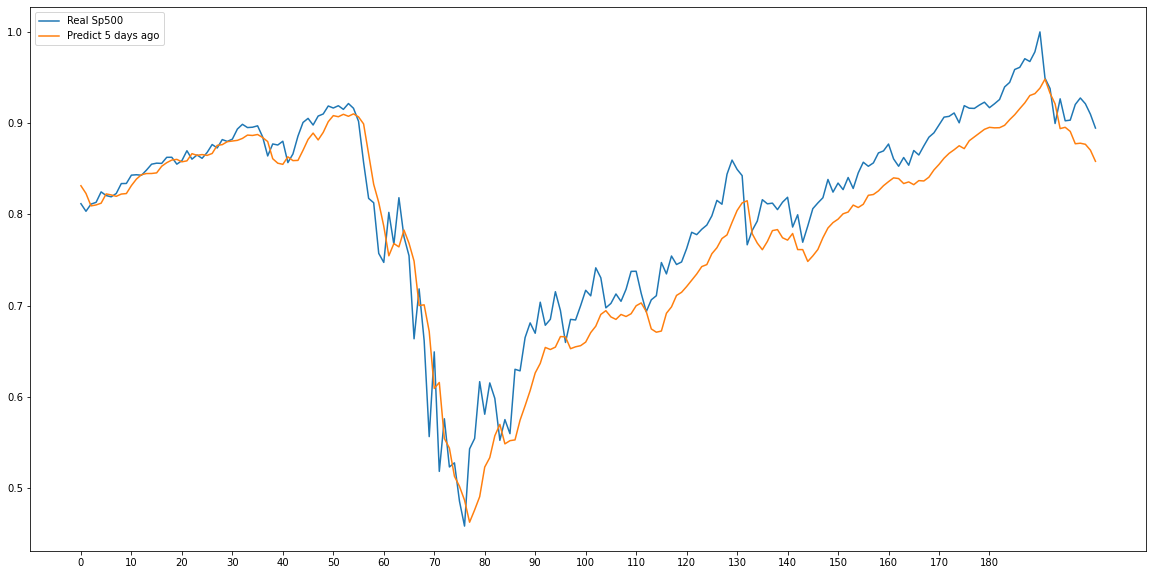

In [22]:
plt.figure(figsize=[20,10])
plt.xticks(np.arange(0,181,10))

plt.plot(test_y, label = 'Real Sp500')
plt.plot(prediction_y ,prediction_x, label = 'Predict 5 days ago')

plt.legend()

In [23]:
# 학습, 훈련 세트로 분할
df_test = reframed.loc['2019-11-01':]
df_train = reframed.loc[:'2019-12-31']

values = df_train.values
test_values = df_test.values

# 분할지점
train = values
test = test_values

n_obs = n_days * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]
print(train_X.shape, len(train_X), train_y.shape)

train_X = train_X.reshape((train_X.shape[0], n_days, n_features))
test_X = test_X.reshape((test_X.shape[0], n_days, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(2244, 440) 2244 (2244,)
(2244, 20, 22) (2244,) (222, 20, 22) (222,)


In [24]:
df_test.iloc

In [26]:
from datetime import datetime  
from datetime import timedelta
from datetime import date
from dateutil.relativedelta import relativedelta

In [29]:
date_end = date(2020,1,2)
ini_sr = pd.Series([0,0],name = 'test')
df_iloc = reframed.index.get_loc(date_end.isoformat())
k = '2020-01-01'
j = 20

result = pd.DataFrame()

while not (k == '2020-09-18'):
    df_test = pd.DataFrame(reframed.iloc[df_iloc-j : df_iloc,:])
    test_values = df_test.values
    test = test_values
    test_X, test_y = test[:, :n_obs], test[:, -n_features]
    test_X = test_X.reshape((test_X.shape[0], n_days, n_features))
    
    
    y_pred = model.predict(test_X)

    print(df_test.index[-1])
    print(y_pred[-1])
    
    k = df_test.index[-1]
    list_t = []
    list_t.append(test_y[-1])
    list_t.extend(list(y_pred[-1]))
    sr = pd.Series(list_t,name = df_test.index[-1])
    ini_sr = pd.concat([ini_sr, sr], axis=1)
    
    df_iloc += 1
    model.fit(test_X, test_y, epochs=100, batch_size=200, verbose=0, shuffle=False) 

2019-12-31
[0.85768205]
2020-01-02
[0.8582401]
2020-01-03
[0.86862516]
2020-01-06
[0.8647843]
2020-01-07
[0.8652699]
2020-01-08
[0.8634659]
2020-01-09
[0.86615527]
2020-01-10
[0.87263554]
2020-01-13
[0.87421983]
2020-01-14
[0.87894803]
2020-01-15
[0.8827278]
2020-01-16
[0.8850382]
2020-01-17
[0.89393437]
2020-01-21
[0.8996549]
2020-01-22
[0.89793354]
2020-01-23
[0.9001526]
2020-01-24
[0.8978904]
2020-01-27
[0.8907859]
2020-01-28
[0.8648807]
2020-01-29
[0.86556286]
2020-01-30
[0.8768797]
2020-01-31
[0.87244546]
2020-02-03
[0.8578272]
2020-02-04
[0.8737377]
2020-02-05
[0.8873657]
2020-02-06
[0.8978987]
2020-02-07
[0.9149211]
2020-02-10
[0.88143396]
2020-02-11
[0.90923333]
2020-02-12
[0.9221497]
2020-02-13
[0.9153646]
2020-02-14
[0.9195447]
2020-02-18
[0.9079646]
2020-02-19
[0.9064083]
2020-02-20
[0.9127907]
2020-02-21
[0.9054225]
2020-02-24
[0.883066]
2020-02-25
[0.87336063]
2020-02-26
[0.79282475]
2020-02-27
[0.81210595]
2020-02-28
[0.7329746]
2020-03-02
[0.715808]
2020-03-03
[0.8184274

In [30]:
ini_sr

,test,2019-12-31,2020-01-02,2020-01-03,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,2020-01-13,...,2020-09-04,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-14,2020-09-15,2020-09-16,2020-09-17,2020-09-18
0,0,0.858938,0.869847,0.860578,0.865184,0.861517,0.867912,0.876637,0.872869,0.882048,...,0.937992,0.899662,0.926709,0.902624,0.903341,0.920495,0.927611,0.921281,0.909804,0.894677
1,0,0.857682,0.858240,0.868625,0.864784,0.865270,0.863466,0.866155,0.872636,0.874220,...,1.001647,0.949037,0.861454,0.914046,0.891293,0.895241,0.941742,0.929581,0.932773,0.888337


In [32]:
ini_sr.to_excel('result.xlsx')